In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import pickle
import seaborn as sns
import csv
import scipy
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC  #Support Vector Classification module  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [612]:
df = pd.read_csv(r'C:\Users\hp\Documents\ADS 2022\Estate_Data.csv')

In [613]:
df.head()

,Name,Plot,Payments,Statement Number,Age,Date,Monthly Income,Where is the customer from?,Gender,Estate
0,MUNALI SITALI,B561,70400,31457,66,1/2/2021,12188,Western,M,Chibombo
1,PATRICIA MUSONDA,B1492,66800,28955,43,1/2/2021,11483,Southern,F,Riverdale
2,PHEWDAYS MWEWA,"B362,B363",59000,28946,47,1/2/2021,22981,North-Western,M,Chibombo
3,PATRICK KALULU,"B368,B369",84400,28926,57,1/2/2021,22491,Lusaka,F,Riverdale
4,EMELY NJOBVU,B388,82700,28941,19,1/2/2021,24937,Lusaka,F,Chibombo


In [614]:
df.rename(columns = {'Payments':'Sales'}, inplace = True)
df.rename(columns = {'Where is the customer from?':'Location'}, inplace = True)
df.head()

,Name,Plot,Sales,Statement Number,Age,Date,Monthly Income,Location,Gender,Estate
0,MUNALI SITALI,B561,70400,31457,66,1/2/2021,12188,Western,M,Chibombo
1,PATRICIA MUSONDA,B1492,66800,28955,43,1/2/2021,11483,Southern,F,Riverdale
2,PHEWDAYS MWEWA,"B362,B363",59000,28946,47,1/2/2021,22981,North-Western,M,Chibombo
3,PATRICK KALULU,"B368,B369",84400,28926,57,1/2/2021,22491,Lusaka,F,Riverdale
4,EMELY NJOBVU,B388,82700,28941,19,1/2/2021,24937,Lusaka,F,Chibombo


In [615]:
df.shape

(44932, 10)

In [616]:
df.dtypes

Name                object
Plot                object
Sales                int64
Statement Number    object
Age                  int64
Date                object
Monthly Income       int64
Location            object
Gender              object
Estate              object
dtype: object

In [617]:
df.head()

,Name,Plot,Sales,Statement Number,Age,Date,Monthly Income,Location,Gender,Estate
0,MUNALI SITALI,B561,70400,31457,66,1/2/2021,12188,Western,M,Chibombo
1,PATRICIA MUSONDA,B1492,66800,28955,43,1/2/2021,11483,Southern,F,Riverdale
2,PHEWDAYS MWEWA,"B362,B363",59000,28946,47,1/2/2021,22981,North-Western,M,Chibombo
3,PATRICK KALULU,"B368,B369",84400,28926,57,1/2/2021,22491,Lusaka,F,Riverdale
4,EMELY NJOBVU,B388,82700,28941,19,1/2/2021,24937,Lusaka,F,Chibombo


In [618]:
df.describe()

,Sales,Age,Monthly Income
count,44932.000000,44932.000000,44932.000000
mean,58751.435503,42.011640,21453.549052
std,14701.731614,16.273991,10701.165880
min,35000.000000,18.000000,3001.000000
25%,45000.000000,28.000000,12176.750000
50%,58100.000000,42.000000,21468.500000
75%,71500.000000,55.000000,30745.250000
max,85000.000000,77.000000,39999.000000


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44932 entries, 0 to 44931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              44932 non-null  object
 1   Plot              44932 non-null  object
 2   Sales             44932 non-null  int64 
 3   Statement Number  44932 non-null  object
 4   Age               44932 non-null  int64 
 5   Date              44932 non-null  object
 6   Monthly Income    44932 non-null  int64 
 7   Location          44932 non-null  object
 8   Gender            44932 non-null  object
 9   Estate            44932 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [620]:
df.Gender.value_counts()

F    28047
M    16885
Name: Gender, dtype: int64

In [621]:
df["Estate"].value_counts()

Riverdale    27439
Chibombo     17493
Name: Estate, dtype: int64

In [622]:
df.isnull().sum()

Name                0
Plot                0
Sales               0
Statement Number    0
Age                 0
Date                0
Monthly Income      0
Location            0
Gender              0
Estate              0
dtype: int64

In [623]:
df['Location'].value_counts()

Lusaka           13505
Copperbelt        6886
Luapula           5434
Muchinga          4720
North-Western     4417
Southern          3221
Northern          2508
Eastern           1518
Central           1513
Western           1210
Name: Location, dtype: int64

In [624]:
df['Sales'].sum()

2639819500

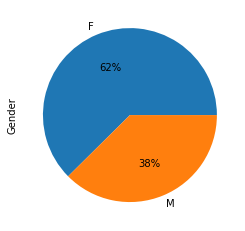

In [625]:
series = df["Gender"].value_counts()

series.plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [626]:
sales_by_Estate = df.groupby(['Estate']).Sales.sum().reset_index(name='Revenues').sort_values(by='Revenues', ascending=False)

In [627]:
sales_by_Estate

,Estate,Revenues
1,Riverdale,1610399800
0,Chibombo,1029419700


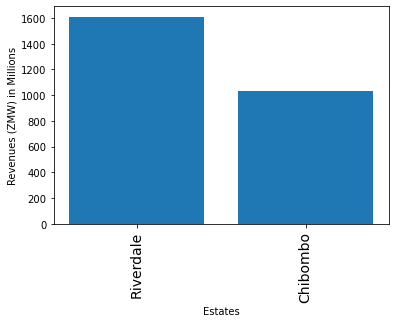

In [628]:
plt.bar(sales_by_Estate['Estate'], sales_by_Estate['Revenues']/1000000)
plt.ylabel('Revenues (ZMW) in Millions')
plt.xlabel('Estates')
plt.xticks(sales_by_Estate['Estate'].values, rotation='vertical', size=14)
plt.show()

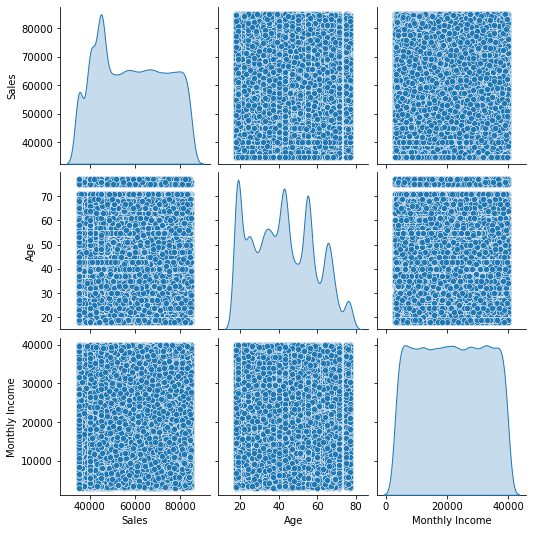

In [629]:
sns.pairplot(data=df, diag_kind='kde')

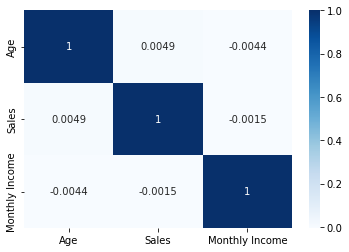

In [630]:
sns.heatmap(df[['Estate', 'Location', 'Age', 'Gender','Sales','Monthly Income']].corr(), cmap='Blues', annot=True)
plt.show()

In [631]:
## Estate to Integer
Estate = {'Chibombo': 1,'Riverdale': 2} 
df.Estate = [Estate[item] for item in df.Estate]

In [632]:
## Location to Integer
Gender = {'F': 1,'M': 2} 
df.Gender = [Gender[item] for item in df.Gender]

In [633]:
## Location to Integer
Location = {'Lusaka': 1,'Copperbelt': 2, 'Eastern': 3, 'Luapula': 4, 'Muchinga': 5, 'North-Western': 6,'Northern': 7, 'Southern': 8, 'Western': 9, 'Central': 10} 
df.Location = [Location[item] for item in df.Location]

In [634]:
df.head()

,Name,Plot,Sales,Statement Number,Age,Date,Monthly Income,Location,Gender,Estate
0,MUNALI SITALI,B561,70400,31457,66,1/2/2021,12188,9,2,1
1,PATRICIA MUSONDA,B1492,66800,28955,43,1/2/2021,11483,8,1,2
2,PHEWDAYS MWEWA,"B362,B363",59000,28946,47,1/2/2021,22981,6,2,1
3,PATRICK KALULU,"B368,B369",84400,28926,57,1/2/2021,22491,1,1,2
4,EMELY NJOBVU,B388,82700,28941,19,1/2/2021,24937,1,1,1


In [635]:
df.drop("Name", axis=1, inplace=True)

In [636]:
df.drop("Plot", axis=1, inplace=True)
df.drop("Statement Number", axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)

In [637]:
df.head()

,Sales,Age,Monthly Income,Location,Gender,Estate
0,70400,66,12188,9,2,1
1,66800,43,11483,8,1,2
2,59000,47,22981,6,2,1
3,84400,57,22491,1,1,2
4,82700,19,24937,1,1,1


In [638]:
df.drop("Sales", axis=1, inplace=True)
df.head()

,Age,Monthly Income,Location,Gender,Estate
0,66,12188,9,2,1
1,43,11483,8,1,2
2,47,22981,6,2,1
3,57,22491,1,1,2
4,19,24937,1,1,1


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Monthly Income'}>],
       [<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Estate'}>, <AxesSubplot:>]],
      dtype=object)

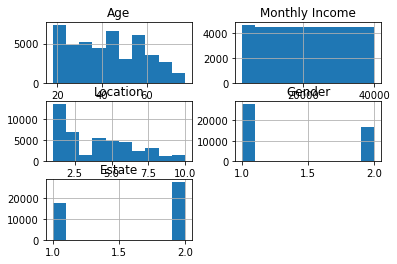

In [639]:
df.hist()

In [640]:
## 1.Shuffling dataset
data = df.reindex(np.random.permutation(df.index))

In [641]:
## 2.Split Dataset into a-Features b-Target
feature = df.drop("Estate", axis=1)
target = df["Estate"]

In [642]:
#feature.head()
target.head()

0    1
1    2
2    1
3    2
4    1
Name: Estate, dtype: int64

In [643]:
# Splitting Features from 

X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.2, random_state=0)

In [644]:
X_train.shape

(35945, 4)

In [645]:
#This is "Supervised" - "Classification" Problem 
#- Data is labelled and can be classified into two distict classes - Exited (0/1)

In [646]:
df.head()

,Age,Monthly Income,Location,Gender,Estate
0,66,12188,9,2,1
1,43,11483,8,1,2
2,47,22981,6,2,1
3,57,22491,1,1,2
4,19,24937,1,1,1


In [647]:
#Testing of different Models to see which one will produce the best result for the model

##Logistic Regression

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Logistic Regression : {}%".format(accuracy_score(pred,y_test)*100))

Logistic Regression : 60.99922109714031%


In [648]:
#Decision Tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)
print("Decision Tree : {}%".format(accuracy_score(pred,y_test)*100))

Decision Tree : 51.99732947590965%


In [649]:
#Gaussian Naive Bayes Model
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Gaussian Naive Bayes : {}%".format(accuracy_score(pred,y_test)*100))

Gaussian Naive Bayes : 60.99922109714031%


In [650]:
#Random Forest Model
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Random Forest Model : 53.32%


In [651]:
confusion_matrix(y_test, pred)

array([[1173, 2332],
       [1863, 3619]], dtype=int64)

In [652]:
#Feature Scaling using sklearn Preprocessing Module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [653]:
X_train
#X_test

array([[ 1.10875548, -1.45373662,  1.15554024, -0.77632734],
       [-1.41311822,  1.19519662, -1.05004209, -0.77632734],
       [-0.0599177 ,  1.65638398,  0.42034613, -0.77632734],
       ...,
       [-0.0599177 ,  1.05749392, -0.68244503, -0.77632734],
       [ 1.6008284 , -0.84980524, -1.05004209, -0.77632734],
       [ 0.06310053, -1.41835403, -0.68244503, -0.77632734]])

In [654]:
#Support Vector Machine

svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  #Train data

SVC(kernel='linear')

In [655]:
#Making Prediction
y_pred = svclassifier.predict(X_test)

In [656]:
print("Support Vector Classifier : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Support Vector Classifier : 53.32%


In [657]:
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)  #Train data

KNeighborsClassifier()

In [658]:
print("K-Nearest Neighbour Classifier : {:.2f}%".format(accuracy_score(pred,y_test)*100))

K-Nearest Neighbour Classifier : 53.32%


In [659]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00      3505\n           2       0.61      1.00      0.76      5482\n\n    accuracy                           0.61      8987\n   macro avg       0.30      0.50      0.38      8987\nweighted avg       0.37      0.61      0.46      8987\n'

In [660]:
model = RandomForestClassifier(n_estimators = 200, random_state=200)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Random Forest Model : 53.25%


In [661]:
print("Enter Location ('Central': 1, 'Copperbelt': 2, 'Eastern': 3, 'Luapula': 4, 'Lusaka': 5, 'Muchinga': 6,'North-Western': 7,'North-Western': 8, 'Southern': 9, 'Western': 10):")
Location = int(input())

print("Enter Gender ('Male': 1,'Female': 2) :")
Gender = int(input())

print("Enter Age :")
Age = int(input())

print("Enter Estimated Salary :")
EstimatedSalary = float(input())

Enter Location ('Central': 1, 'Copperbelt': 2, 'Eastern': 3, 'Luapula': 4, 'Lusaka': 5, 'Muchinga': 6,'North-Western': 7,'North-Western': 8, 'Southern': 9, 'Western': 10):
1
Enter Gender ('Male': 1,'Female': 2) :
2
Enter Age :
34
Enter Estimated Salary :
35000


In [662]:
X_user = np.array([Location,Gender,Age,EstimatedSalary])

In [663]:
X_user

array([1.0e+00, 2.0e+00, 3.4e+01, 3.5e+04])

In [664]:
y_pred = model.predict([X_user])

In [665]:
index = y_pred

In [668]:
if index == 1:
    print("Customer fits the Chibombo Profile")
else:
    print("Customer fits the Riverdale Profile")

Customer fits the Riverdale Profile


In [669]:
with open('model_NHEF', 'wb') as files:
    pickle.dump(model, files)